In [15]:
#Importing Libriries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import plotly.express as px
from sklearn.preprocessing  import MinMaxScaler

In [16]:
#importing dataset
df = pd.read_csv(r"C:\Users\swamy\Desktop\Zidio Internship\Quote-Equity-ADANIENT-EQ-27-06-2024-to-27-06-2025.csv")

In [17]:
#df = df.sort_values('Date')
df.info()
df.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           249 non-null    object 
 1   Day            249 non-null    object 
 2   Month          249 non-null    object 
 3   Quarter        249 non-null    object 
 4   Year           249 non-null    int64  
 5   series         249 non-null    object 
 6   OPEN           249 non-null    float64
 7   HIGH           249 non-null    float64
 8   LOW            249 non-null    float64
 9   PREV. CLOSE    249 non-null    float64
 10  ltp            249 non-null    float64
 11  close          249 non-null    float64
 12  vwap           249 non-null    float64
 13  52W H          249 non-null    float64
 14  52W L          249 non-null    float64
 15  Volume         249 non-null    float64
 16  No of trades   249 non-null    int64  
dtypes: float64(10), int64(2), object(5)
memory usage: 33.2

,Date,Day,Month,Quarter,Year,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,Volume,No of trades
0,26-Jun-25,Thursday,Jun,Q2,2025,EQ,2535.0,2593.6,2522.2,2527.2,2580.0,2586.2,2559.96,3258.0,2025.0,1339627.0,57666
1,25-Jun-25,Wednesday,Jun,Q2,2025,EQ,2519.9,2541.6,2512.1,2505.6,2530.0,2527.2,2527.87,3258.0,2025.0,921346.0,34059
2,24-Jun-25,Tuesday,Jun,Q2,2025,EQ,2504.0,2544.6,2500.2,2472.0,2505.0,2505.6,2523.06,3258.0,2025.0,996405.0,53316
3,23-Jun-25,Monday,Jun,Q2,2025,EQ,2438.0,2492.6,2421.0,2448.4,2466.0,2472.0,2467.70,3258.0,2025.0,790535.0,34421
4,20-Jun-25,Friday,Jun,Q2,2025,EQ,2428.0,2461.3,2415.0,2420.6,2449.6,2448.4,2447.49,3345.0,2025.0,3002549.0,67242
5,19-Jun-25,Thursday,Jun,Q2,2025,EQ,2466.3,2468.9,2405.1,2459.1,2414.0,2420.6,2431.18,3345.0,2025.0,688209.0,46707
6,18-Jun-25,Wednesday,Jun,Q2,2025,EQ,2491.9,2495.9,2445.4,2488.5,2456.9,2459.1,2467.90,3345.0,2025.0,667044.0,40514
7,17-Jun-25,Tuesday,Jun,Q2,2025,EQ,2535.0,2539.6,2479.0,2544.0,2485.2,2488.5,2499.54,3345.0,2025.0,703343.0,34502
8,16-Jun-25,Monday,Jun,Q2,2025,EQ,2500.0,2563.3,2462.0,2507.9,2539.9,2544.0,2527.44,3345.0,2025.0,956459.0,41826
9,13-Jun-25,Friday,Jun,Q2,2025,EQ,2498.0,2516.0,2460.0,2543.7,2506.0,2507.9,2502.73,3345.0,2025.0,695869.0,41308


In [18]:
# --- Fix 1: Clean Column Names (remove trailing spaces) ---
df.columns = df.columns.str.strip()

# --- Fix 2: Convert 'Date' column to datetime objects ---
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# --- Fix 3: Sort the DataFrame chronologically ---
df = df.sort_values(by='Date')

# --- Fix 4: Set the 'Date' as the index (very good practice for time series) ---
df = df.set_index('Date')

# Now display the head to confirm it's sorted correctly
print("Data sorted correctly:")
df.head()

Data sorted correctly:


,Day,Month,Quarter,Year,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,Volume,No of trades
Date,,,,,,,,,,,,,,,,
2024-06-27,Thursday,Jun,Q2,2024,EQ,3177.00,3202.25,3150.00,3170.50,3175.0,3175.15,3170.85,3743.9,2142.0,5114980.0,153131
2024-06-28,Friday,Jun,Q2,2024,EQ,3190.00,3211.95,3157.00,3175.15,3174.0,3177.15,3184.74,3743.9,2142.0,960905.0,51717
2024-07-01,Monday,Jul,Q3,2024,EQ,3179.95,3193.15,3157.55,3177.15,3180.0,3183.80,3175.58,3743.9,2142.0,832170.0,54965
2024-07-02,Tuesday,Jul,Q3,2024,EQ,3179.85,3207.80,3131.05,3183.80,3150.0,3153.20,3169.46,3743.9,2142.0,1490844.0,93900
2024-07-03,Wednesday,Jul,Q3,2024,EQ,3158.00,3194.55,3147.75,3153.20,3185.0,3190.95,3170.61,3743.9,2142.0,1152522.0,56436


In [19]:
df.head(60)

,Day,Month,Quarter,Year,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,Volume,No of trades
Date,,,,,,,,,,,,,,,,
2024-06-27,Thursday,Jun,Q2,2024,EQ,3177.00,3202.25,3150.00,3170.50,3175.00,3175.15,3170.85,3743.9,2142.0,5114980.0,153131
2024-06-28,Friday,Jun,Q2,2024,EQ,3190.00,3211.95,3157.00,3175.15,3174.00,3177.15,3184.74,3743.9,2142.0,960905.0,51717
2024-07-01,Monday,Jul,Q3,2024,EQ,3179.95,3193.15,3157.55,3177.15,3180.00,3183.80,3175.58,3743.9,2142.0,832170.0,54965
2024-07-02,Tuesday,Jul,Q3,2024,EQ,3179.85,3207.80,3131.05,3183.80,3150.00,3153.20,3169.46,3743.9,2142.0,1490844.0,93900
2024-07-03,Wednesday,Jul,Q3,2024,EQ,3158.00,3194.55,3147.75,3153.20,3185.00,3190.95,3170.61,3743.9,2142.0,1152522.0,56436
2024-07-04,Thursday,Jul,Q3,2024,EQ,3192.00,3194.45,3138.05,3190.95,3143.90,3144.25,3156.24,3743.9,2142.0,1055391.0,72430
2024-07-05,Friday,Jul,Q3,2024,EQ,3143.90,3158.55,3123.95,3144.25,3146.15,3147.90,3143.96,3743.9,2142.0,663988.0,42349
2024-07-08,Monday,Jul,Q3,2024,EQ,3147.90,3158.20,3075.00,3147.90,3112.00,3113.60,3104.41,3743.9,2142.0,1155112.0,84099
2024-07-09,Tuesday,Jul,Q3,2024,EQ,3115.95,3158.00,3100.50,3113.60,3112.00,3110.75,3125.40,3743.9,2142.0,922403.0,57330


In [20]:
#Check for missing values
df.isnull().values.any().sum
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Day             0
Month           0
Quarter         0
Year            0
series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
Volume          0
No of trades    0
dtype: int64


In [21]:
df.dropna()

,Day,Month,Quarter,Year,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,Volume,No of trades
Date,,,,,,,,,,,,,,,,
2024-06-27,Thursday,Jun,Q2,2024,EQ,3177.00,3202.25,3150.00,3170.50,3175.0,3175.15,3170.85,3743.9,2142.0,5114980.0,153131
2024-06-28,Friday,Jun,Q2,2024,EQ,3190.00,3211.95,3157.00,3175.15,3174.0,3177.15,3184.74,3743.9,2142.0,960905.0,51717
2024-07-01,Monday,Jul,Q3,2024,EQ,3179.95,3193.15,3157.55,3177.15,3180.0,3183.80,3175.58,3743.9,2142.0,832170.0,54965
2024-07-02,Tuesday,Jul,Q3,2024,EQ,3179.85,3207.80,3131.05,3183.80,3150.0,3153.20,3169.46,3743.9,2142.0,1490844.0,93900
2024-07-03,Wednesday,Jul,Q3,2024,EQ,3158.00,3194.55,3147.75,3153.20,3185.0,3190.95,3170.61,3743.9,2142.0,1152522.0,56436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-20,Friday,Jun,Q2,2025,EQ,2428.00,2461.30,2415.00,2420.60,2449.6,2448.40,2447.49,3345.0,2025.0,3002549.0,67242
2025-06-23,Monday,Jun,Q2,2025,EQ,2438.00,2492.60,2421.00,2448.40,2466.0,2472.00,2467.70,3258.0,2025.0,790535.0,34421
2025-06-24,Tuesday,Jun,Q2,2025,EQ,2504.00,2544.60,2500.20,2472.00,2505.0,2505.60,2523.06,3258.0,2025.0,996405.0,53316


In [22]:
df.duplicated()

Date
2024-06-27    False
2024-06-28    False
2024-07-01    False
2024-07-02    False
2024-07-03    False
              ...  
2025-06-20    False
2025-06-23    False
2025-06-24    False
2025-06-25    False
2025-06-26    False
Length: 249, dtype: bool

In [23]:
#To see number of Rows and Columns old Dataframe
df.shape

(249, 16)

In [24]:
#To see names of the Columns of new Dataframe
df.columns

Index(['Day', 'Month', 'Quarter', 'Year', 'series', 'OPEN', 'HIGH', 'LOW',
       'PREV. CLOSE', 'ltp', 'close', 'vwap', '52W H', '52W L', 'Volume',
       'No of trades'],
      dtype='object')

In [25]:
#To see the rows means, standard and min
df.describe()

,Year,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,Volume,No of trades
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.00000,249.000000,249.000000,2.490000e+02,249.000000
mean,2024.485944,2652.171084,2687.023896,2610.476707,2648.593173,2645.414859,2646.246586,2648.89261,3720.074297,2072.457831,1.742753e+06,86811.036145
std,0.500809,342.724515,339.821391,343.937523,343.652256,341.927037,342.065356,340.64368,98.256145,57.564123,2.550618e+06,90692.987664
min,2024.000000,2085.100000,2111.350000,2025.000000,2096.000000,2097.550000,2096.000000,2078.96000,3258.000000,2025.000000,3.046730e+05,13462.000000
25%,2024.000000,2365.000000,2402.000000,2315.100000,2354.300000,2357.000000,2354.300000,2353.79000,3743.900000,2025.000000,8.159480e+05,50284.000000
50%,2024.000000,2520.000000,2548.100000,2490.000000,2518.800000,2518.000000,2518.800000,2518.05000,3743.900000,2025.000000,1.054797e+06,64469.000000
75%,2025.000000,3019.000000,3038.550000,2972.150000,3013.750000,3007.950000,3012.350000,3007.33000,3743.900000,2142.000000,1.632446e+06,86754.000000
max,2025.000000,3209.000000,3258.000000,3171.050000,3217.250000,3225.100000,3217.250000,3212.46000,3743.900000,2142.000000,2.179667e+07,792663.000000


In [26]:
# Calculate descriptive statistics for the 'Open' column
df['close'].describe()

count     249.000000
mean     2646.246586
std       342.065356
min      2096.000000
25%      2354.300000
50%      2518.800000
75%      3012.350000
max      3217.250000
Name: close, dtype: float64

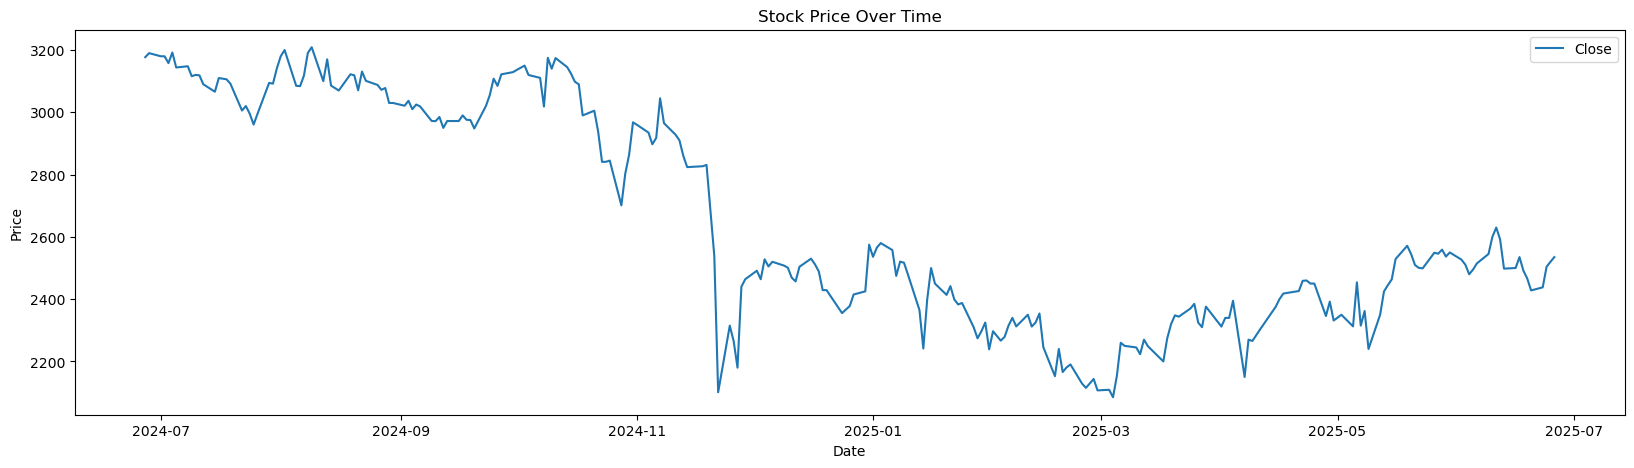

In [27]:
#Data Visualization

import math

plt.figure(figsize=(20, 5))
plt.plot(df['OPEN'], label='Close')
plt.title("Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

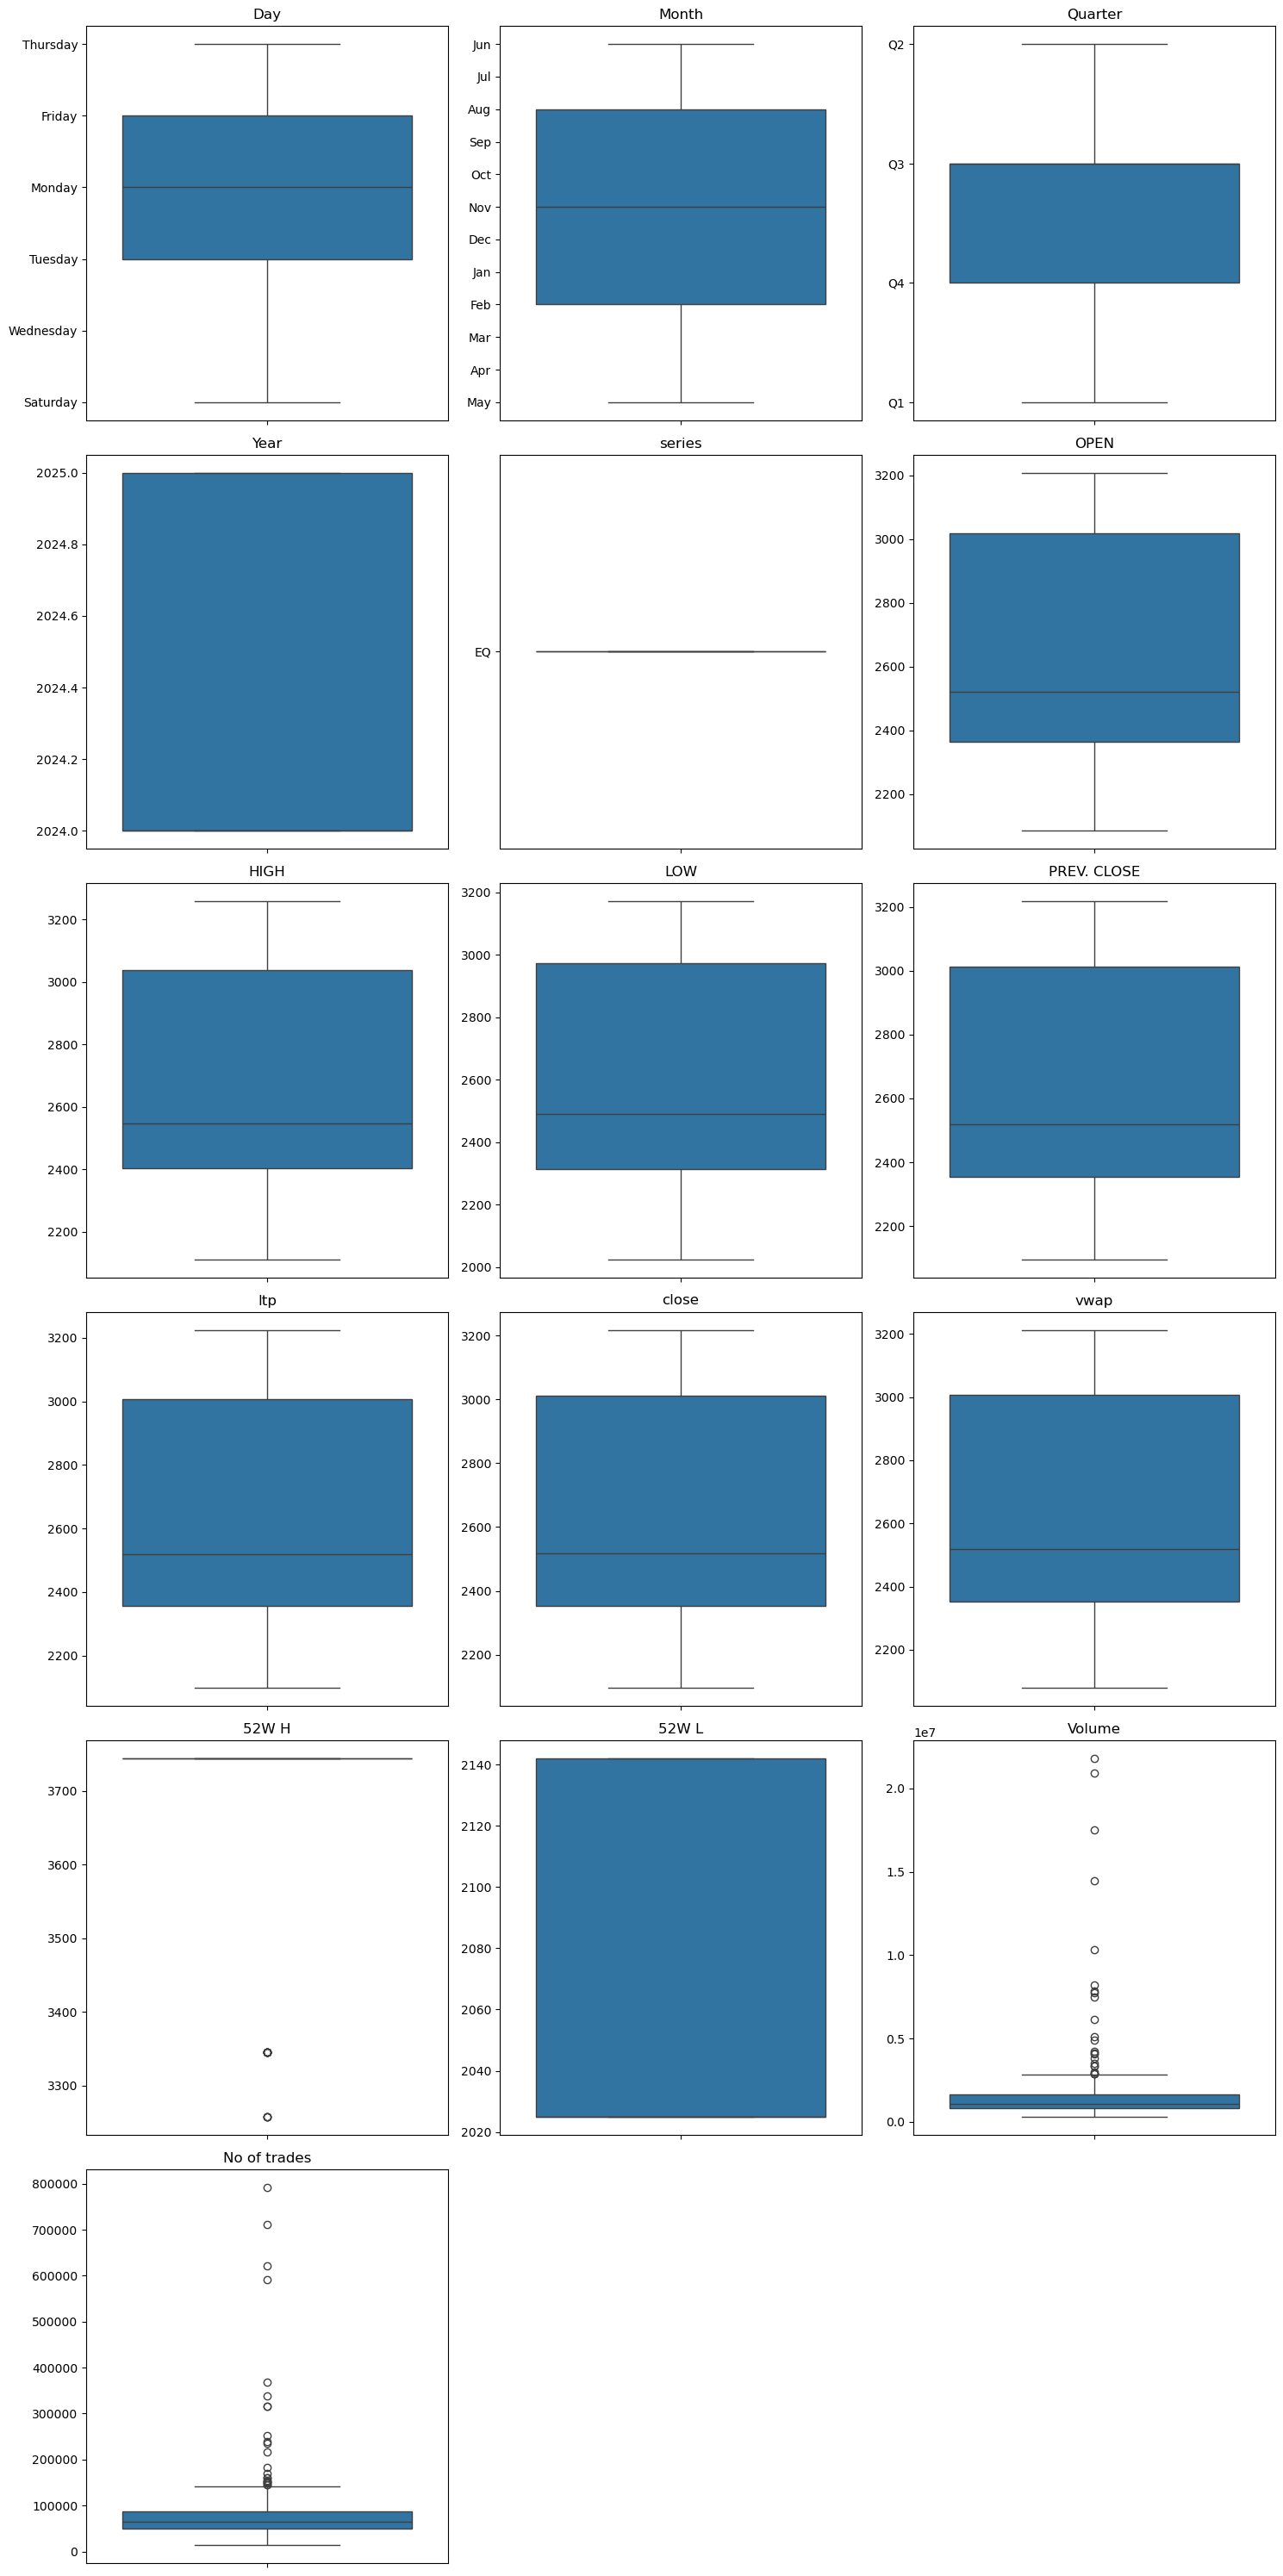

In [28]:
import seaborn as sns

num_cols = 3
num_features = len(df.columns)
num_rows = math.ceil(num_features / num_cols)

fig = plt.figure(figsize=(15, num_rows * 5))

for i, x in enumerate(df.columns, start=1):
    plt.subplot(num_rows, num_cols, i)
    ax = sns.boxplot(df[x])
    ax.set(xlabel=None)
    plt.title(str(x), loc='center')
    plt.xlabel(None)
    plt.ylabel(None)

plt.tight_layout()
plt.show()

In [29]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [30]:
#Time Series Model

#Checking if the Data is Stationary

from statsmodels.tsa.stattools import adfuller

# Extract the 'Close' column as a series
close_series = df['close']

# Run ADF test
def check_stationarity(series):
    result = adfuller(series.dropna())  # Drop NaN values if any
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

check_stationarity(close_series)

ADF Statistic: -1.9316498600286731
p-value: 0.31732158587318127
The series is not stationary.


In [31]:
#Scaling the Data
scaler = MinMaxScaler()
df['close'] = scaler.fit_transform(df[['close']])


In [32]:
#Train-Test Split

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# Extract the feature column
adj_close_values = df['close'].values  

# Create dataset with look_back window
X, Y = create_dataset(adj_close_values, look_back=30)

# Split dataset into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [33]:
#Reshaping the Data for the LSTM Model

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [34]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [35]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Build the LSTM Model ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# --- Compile the Model ---
model.compile(optimizer='adam', loss='mean_squared_error')

# --- Train the Model ---
history = model.fit(trainX, trainY, epochs=50, batch_size=32, verbose=1)

C:\Users\swamy\AppData\Local\Programs\Orange\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1659
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0282
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0139
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0260
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0121
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0149
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0134
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0133
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0136
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0133
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0159
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0127
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0109
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0123
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [37]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.931649860028674
p-value: 0.3173215858731808


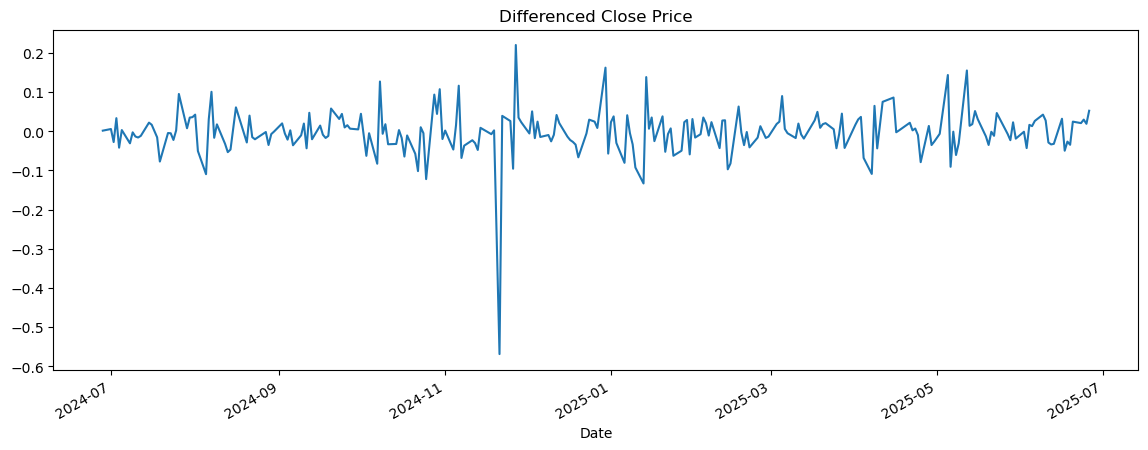

In [38]:
# Apply first-order differencing
df_diff = df['close'].diff().dropna()

# Plot differenced data
df_diff.plot(figsize=(14, 5), title='Differenced Close Price')
plt.show()


In [39]:
model = sm.tsa.ARIMA(df['close'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 349.559
Date:                Sat, 28 Jun 2025   AIC                           -693.118
Time:                        12:48:20   BIC                           -682.577
Sample:                             0   HQIC                          -688.875
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7985      0.188      4.255      0.000       0.431       1.166
ma.L1         -0.8853      0.146     -6.049      0.000      -1.172      -0.598
sigma2         0.0035   8.11e-05     43.051      0.0

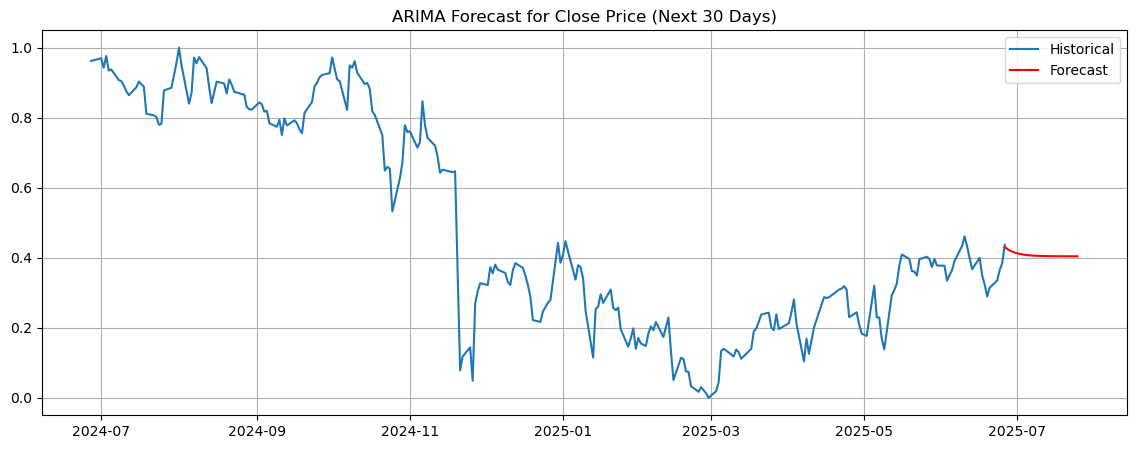

In [40]:
forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(14,5))
plt.plot(df['close'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for Close Price (Next 30 Days)')
plt.legend()
plt.grid(True)
plt.show()


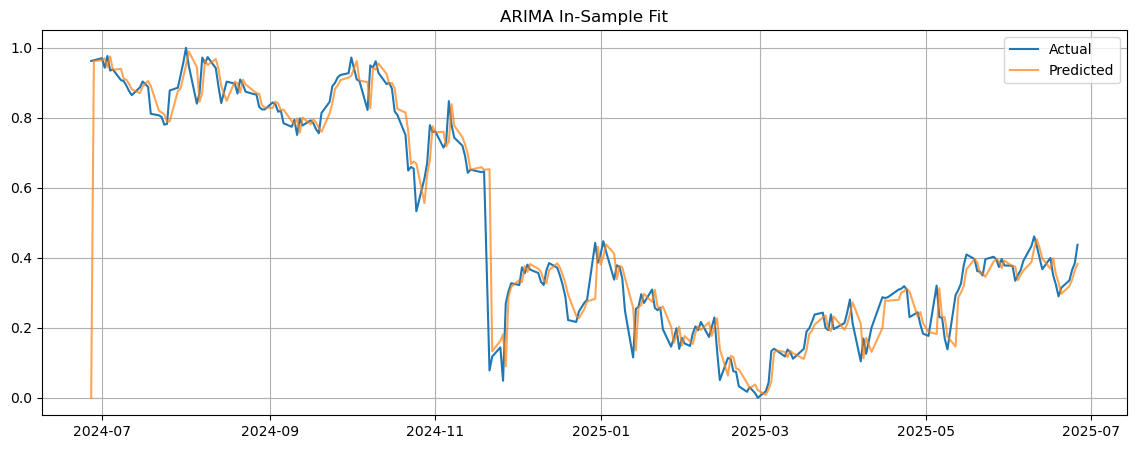

In [41]:
pred = model_fit.predict(start=0, end=len(df)-1, typ='levels')
plt.figure(figsize=(14, 5))
plt.plot(df['close'], label='Actual')
plt.plot(pred, label='Predicted', alpha=0.7)
plt.legend()
plt.title("ARIMA In-Sample Fit")
plt.grid(True)
plt.show()


In [42]:

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
#Prepare the Data for Prophet
prophet_df = df.reset_index()[['Date', 'close']]
prophet_df.columns = ['ds', 'y']
prophet_df.head()


,ds,y
0,2024-06-27,0.962453
1,2024-06-28,0.964236
2,2024-07-01,0.970167
3,2024-07-02,0.942876
4,2024-07-03,0.976544


In [44]:
#Initialize and Fit the Prophet Model

model = Prophet()
model.fit(prophet_df)



12:48:22 - cmdstanpy - INFO - Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# Forecast the next 30 days
future = model.make_future_dataframe(periods=30)

# Predict the future values
forecast = model.predict(future)


In [46]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds      yhat  yhat_lower  yhat_upper
274 2025-07-22  0.434957    0.306289    0.563927
275 2025-07-23  0.447033    0.315250    0.589812
276 2025-07-24  0.440292    0.297888    0.565936
277 2025-07-25  0.426497    0.294036    0.559536
278 2025-07-26  0.405603    0.260473    0.538668


In [47]:
#Create Future Dates for Forecasting

future = model.make_future_dataframe(periods=30)
future.tail()


,ds
274,2025-07-22
275,2025-07-23
276,2025-07-24
277,2025-07-25
278,2025-07-26


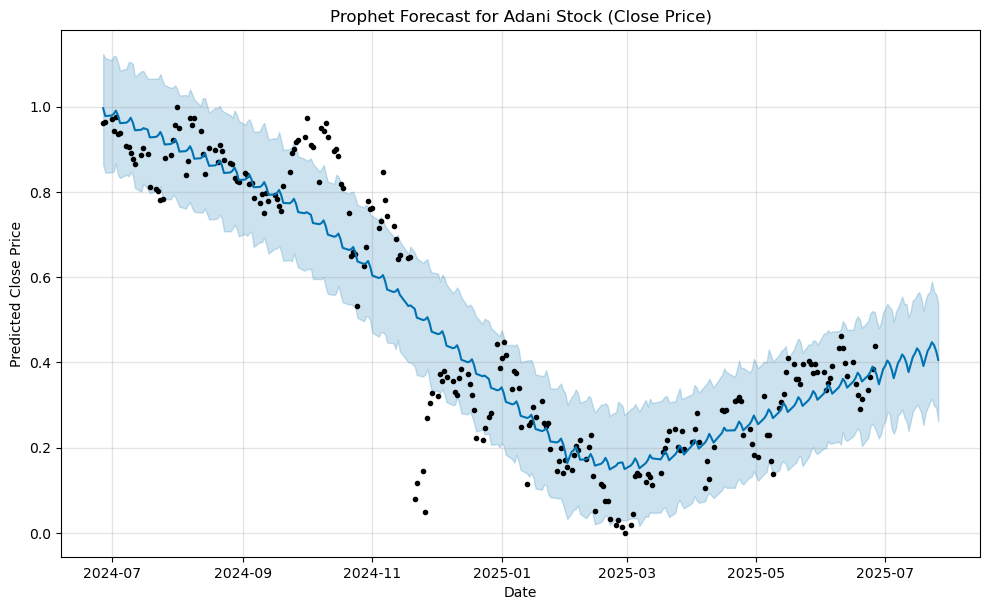

In [48]:
#Plot the Forecast

model.plot(forecast)
plt.title('Prophet Forecast for Adani Stock (Close Price)')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.grid(True)
plt.show()


In [49]:
#In-sample Evaluation

# Merge actual and predicted values for dates that already exist
compare_df = prophet_df.copy()
compare_df['yhat'] = forecast.loc[forecast['ds'].isin(prophet_df['ds']), 'yhat'].values

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(compare_df['y'], compare_df['yhat'])
rmse = mean_squared_error(compare_df['y'], compare_df['yhat'], squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 0.08
RMSE: 0.10


In [50]:
values = df['close'].values.reshape(-1, 1)


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)


In [52]:
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

SEQ_LEN = 60
X, y = create_sequences(scaled_values, SEQ_LEN)


In [53]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [54]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
   LSTM(50, return_sequences=True, input_shape=(SEQ_LEN, 1)),
   Dropout(0.2),
   LSTM(50),
   Dropout(0.2),
   Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(
   X_train, y_train,
   epochs=20,
   batch_size=32,
   validation_data=(X_test, y_test),
   verbose=2
)


Epoch 1/20
5/5 - 5s - 1s/step - loss: 0.1577 - val_loss: 0.0288
Epoch 2/20
5/5 - 1s - 107ms/step - loss: 0.0376 - val_loss: 0.0124
Epoch 3/20
5/5 - 1s - 102ms/step - loss: 0.0382 - val_loss: 0.0040
Epoch 4/20
5/5 - 0s - 68ms/step - loss: 0.0244 - val_loss: 0.0095
Epoch 5/20
5/5 - 0s - 69ms/step - loss: 0.0256 - val_loss: 0.0082
Epoch 6/20
5/5 - 0s - 70ms/step - loss: 0.0215 - val_loss: 0.0043
Epoch 7/20
5/5 - 0s - 68ms/step - loss: 0.0234 - val_loss: 0.0041
Epoch 8/20
5/5 - 0s - 69ms/step - loss: 0.0195 - val_loss: 0.0058
Epoch 9/20
5/5 - 0s - 68ms/step - loss: 0.0196 - val_loss: 0.0074
Epoch 10/20
5/5 - 0s - 68ms/step - loss: 0.0175 - val_loss: 0.0060
Epoch 11/20
5/5 - 0s - 70ms/step - loss: 0.0188 - val_loss: 0.0067
Epoch 12/20
5/5 - 0s - 69ms/step - loss: 0.0154 - val_loss: 0.0063
Epoch 13/20
5/5 - 0s - 72ms/step - loss: 0.0178 - val_loss: 0.0076
Epoch 14/20
5/5 - 0s - 69ms/step - loss: 0.0191 - val_loss: 0.0070
Epoch 15/20
5/5 - 0s - 70ms/step - loss: 0.0144 - val_loss: 0.0063
Epoc

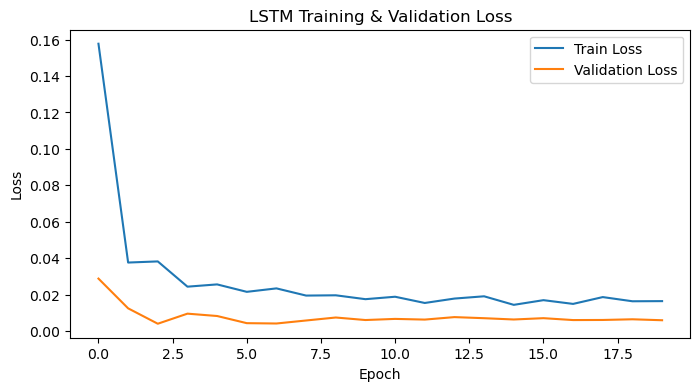

In [57]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [58]:
y_pred_scaled = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step


In [59]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred_scaled)


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
print(f"Test MAE: {mae:.2f}, Test RMSE: {rmse:.2f}")


Test MAE: 0.06, Test RMSE: 0.08


In [61]:
last_seq = scaled_values[-SEQ_LEN:].reshape(1, SEQ_LEN, 1)
future_preds = []
for _ in range(30):   # next 30 days
    pred = model.predict(last_seq)[0,0]
    future_preds.append(pred)
    last_seq = np.append(last_seq[:,1:,:], [[[pred]]], axis=1)

# Inverse scale
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

In [62]:
last_date = df.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='D')


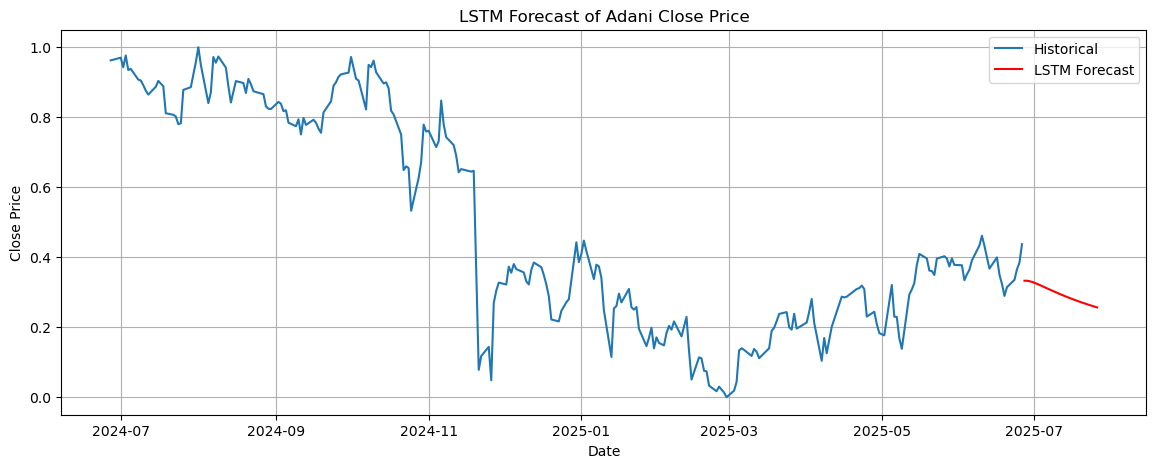

In [63]:
plt.figure(figsize=(14,5))
plt.plot(df['close'], label='Historical')
plt.plot(future_dates, future_preds, label='LSTM Forecast', color='red')
plt.title('LSTM Forecast of Adani Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [65]:
from nbformat import write, v4 as nbf
from nbformat import read

# Load existing notebook
notebook_path = r"C:\Users\swamy\Desktop\Zidio Internship\Adani Stock Market (1).ipynb"
with open(r"C:\Users\swamy\Desktop\Zidio Internship\Adani Stock Market (1).ipynb", "r", encoding="utf-8") as f:
    nb_data = read(f, as_version=4)

# LSTM cells to append
lstm_cells = [

    nbf.new_markdown_cell("## 🔁 LSTM-Based Forecasting for Adani Stock Price"),

    nbf.new_code_cell(
        "# Step 1: Prepare the data\n"
        "values = df['Close'].values.reshape(-1, 1)\n"
        "from sklearn.preprocessing import MinMaxScaler\n"
        "scaler = MinMaxScaler(feature_range=(0, 1))\n"
        "scaled_values = scaler.fit_transform(values)\n\n"
        "def create_sequences(data, seq_length=60):\n"
        "    X, y = [], []\n"
        "    for i in range(seq_length, len(data)):\n"
        "        X.append(data[i-seq_length:i, 0])\n"
        "        y.append(data[i, 0])\n"
        "    return np.array(X), np.array(y)\n\n"
        "SEQ_LEN = 60\n"
        "X, y = create_sequences(scaled_values, SEQ_LEN)\n"
        "X = X.reshape((X.shape[0], X.shape[1], 1))\n\n"
        "# Split into train and test\n"
        "split = int(0.8 * len(X))\n"
        "X_train, X_test = X[:split], X[split:]\n"
        "y_train, y_test = y[:split], y[split:]"
    ),

    nbf.new_code_cell(
        "# Step 2: Build and compile LSTM model\n"
        "from tensorflow.keras.models import Sequential\n"
        "from tensorflow.keras.layers import LSTM, Dense, Dropout\n\n"
        "model = Sequential([\n"
        "    LSTM(50, return_sequences=True, input_shape=(SEQ_LEN, 1)),\n"
        "    Dropout(0.2),\n"
        "    LSTM(50),\n"
        "    Dropout(0.2),\n"
        "    Dense(1)\n"
        "])\n\n"
        "model.compile(optimizer='adam', loss='mean_squared_error')\n"
        "model.summary()"
    ),

    nbf.new_code_cell(
        "# Step 3: Train the model\n"
        "history = model.fit(\n"
        "    X_train, y_train,\n"
        "    epochs=20,\n"
        "    batch_size=32,\n"
        "    validation_data=(X_test, y_test),\n"
        "    verbose=2\n"
        ")"
    ),

    nbf.new_code_cell(
        "# Step 4: Plot training vs validation loss\n"
        "import matplotlib.pyplot as plt\n"
        "plt.figure(figsize=(8,4))\n"
        "plt.plot(history.history['loss'], label='Train Loss')\n"
        "plt.plot(history.history['val_loss'], label='Validation Loss')\n"
        "plt.title('LSTM Training & Validation Loss')\n"
        "plt.xlabel('Epoch')\n"
        "plt.ylabel('Loss')\n"
        "plt.legend()\n"
        "plt.show()"
    ),

    nbf.new_code_cell(
        "# Step 5: Make predictions and evaluate\n"
        "y_pred_scaled = model.predict(X_test)\n"
        "y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))\n"
        "y_pred_inv = scaler.inverse_transform(y_pred_scaled)\n\n"
        "from sklearn.metrics import mean_absolute_error, mean_squared_error\n"
        "mae = mean_absolute_error(y_test_inv, y_pred_inv)\n"
        "rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)\n"
        "print(f'Test MAE: {mae:.2f}, Test RMSE: {rmse:.2f}')"
    ),

    nbf.new_code_cell(
        "# Step 6: Forecast next 30 days\n"
        "last_seq = scaled_values[-SEQ_LEN:].reshape(1, SEQ_LEN, 1)\n"
        "future_preds = []\n"
        "for _ in range(30):\n"
        "    pred = model.predict(last_seq)[0,0]\n"
        "    future_preds.append(pred)\n"
        "    last_seq = np.append(last_seq[:,1:,:], [[[pred]]], axis=1)\n\n"
        "future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))"
    ),

    nbf.new_code_cell(
        "# Step 7: Plot future forecast\n"
        "import pandas as pd\n"
        "last_date = df.index[-1]\n"
        "future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='D')\n\n"
        "plt.figure(figsize=(14,5))\n"
        "plt.plot(df['Close'], label='Historical')\n"
        "plt.plot(future_dates, future_preds, label='LSTM Forecast', color='red')\n"
        "plt.title('LSTM Forecast of Adani Close Price')\n"
        "plt.xlabel('Date')\n"
        "plt.ylabel('Close Price')\n"
        "plt.legend()\n"
        "plt.grid(True)\n"
        "plt.show()"
    )
]

# Append the LSTM section to the notebook
nb_data.cells.extend(lstm_cells)

# Save updated notebook
updated_path = r"C:\Users\swamy\Desktop\Zidio Internship\Adani Stock Market (1).ipynb"
with open(updated_path, "w", encoding="utf-8") as f:
    write(nb_data, f)

updated_path


'C:\\Users\\swamy\\Desktop\\Zidio Internship\\Adani Stock Market (1).ipynb'

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prophet actual vs predicted for historical period
compare_df = prophet_df.copy()
compare_df['yhat'] = forecast.loc[forecast['ds'].isin(prophet_df['ds']), 'yhat'].values

prophet_mae = mean_absolute_error(compare_df['y'], compare_df['yhat'])
prophet_rmse = mean_squared_error(compare_df['y'], compare_df['yhat'], squared=False)


In [120]:
lstm_mae = mean_absolute_error(y_test_inv, y_pred_inv)
lstm_rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)


In [124]:
# Assuming model_fit is your ARIMA model
arima_pred = model_fit.predict(start=0, end=len(df)-1, typ='levels')

arima_mae = mean_absolute_error(df['close'], arima_pred)
arima_rmse = mean_squared_error(df['close'], arima_pred, squared=False)


In [126]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'Prophet', 'LSTM'],
    'MAE': [arima_mae, prophet_mae, lstm_mae],
    'RMSE': [arima_rmse, prophet_rmse, lstm_rmse]
})

# Sort by best RMSE
comparison_df = comparison_df.sort_values(by='RMSE').reset_index(drop=True)
comparison_df


,Model,MAE,RMSE
0,LSTM,0.064229,0.076919
1,ARIMA,0.039986,0.084843
2,Prophet,0.075045,0.102489


## 🔁 LSTM-Based Forecasting for Adani Stock Price

In [ ]:
# Step 1: Prepare the data
values = df['Close'].values.reshape(-1, 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

SEQ_LEN = 60
X, y = create_sequences(scaled_values, SEQ_LEN)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Step 2: Build and compile LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

In [ ]:
# Step 3: Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

In [ ]:
# Step 4: Plot training vs validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 5: Make predictions and evaluate
y_pred_scaled = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
print(f'Test MAE: {mae:.2f}, Test RMSE: {rmse:.2f}')

In [ ]:
# Step 6: Forecast next 30 days
last_seq = scaled_values[-SEQ_LEN:].reshape(1, SEQ_LEN, 1)
future_preds = []
for _ in range(30):
    pred = model.predict(last_seq)[0,0]
    future_preds.append(pred)
    last_seq = np.append(last_seq[:,1:,:], [[[pred]]], axis=1)

future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))

In [ ]:
# Step 7: Plot future forecast
import pandas as pd
last_date = df.index[-1]
future_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='D')

plt.figure(figsize=(14,5))
plt.plot(df['Close'], label='Historical')
plt.plot(future_dates, future_preds, label='LSTM Forecast', color='red')
plt.title('LSTM Forecast of Adani Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()